<a href="https://colab.research.google.com/github/dohyun93/hongong_mldl/blob/main/4_1_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 로지스틱 회귀

1장부터 3장까지는 k-최근접 이웃 분류와 회귀, 그리고 훈련 세트를 활용한 데이터 전처리(특성공학, np의 메서드 들 사용)와 훈련/테스트 세트 나누는 방법을 학습했다.

이번 장은 이름만 회귀인 '로지스틱 회귀'를 공부해본다. (실제로는 분류에 속한다.)

먼저 학습 데이터로 주어지는 특성은 (길이, 높이, 두께, 대각선 길이, 무게)라고 할 때 다수의 생선들을 클래스로 갖는 훈련 데이터들을 학습하여 특성이 주어졌을 때 어떤 클래스의 데이터라고 분류할 수 있을까?

가장 쉬운 방법은 k-최근접이웃 분류와 같이 데이터가 주어졌을 때 n_neighbors 숫자만큼 주변의 데이터를 보고 가장 다수의 클래스로 분류 결과를 예측할 것이다.

이에대한 내용을 pandas와 numpy를 사용해서 확인해보자.


In [2]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
# 첫 5개 데이터만 볼 수 있다 : head()
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [5]:
# 그럼 'Species' 열에서 생선의 고유한 품종들이 어떤게 있는지 확인해보자.
# pd.unique() -> 인자로 주어진 데이터에서 중복을 제거한 결과를 리턴한다.

print("Unique fish classes: ", pd.unique(fish['Species']))

Unique fish classes:  ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [8]:
# 'Species' 열 외의 나머지 열들을 학습에 사용하는 특성으로 활용해보자.
# 데이터프레임에서 리스트로 가져올 열들을 지정한 뒤, to_numpy() 로 넘파이 배열로 변환시킨다.
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

# 첫 5개의 데이터를 확인해보자.
print("numpy.array 형태의 특성데이터 (첫 5개)")
print(fish_input[:5])

print("df형태의 첫 데이터 5개: ")
print(fish.head())

numpy.array 형태의 특성데이터 (첫 5개)
[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
df형태의 첫 데이터 5개: 
  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [9]:
# 비슷한 방식으로 타겟 데이터도 준비해보자.
fish_target = fish['Species'].to_numpy()

In [10]:
# input과 타겟을 준비했으니, 이들을 훈련세트와 테스트세트로 나누어보자.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 길이,무게 같이 특성간 스케일이 다르므로, 훈련 세트를 기준으로 표준화 시키고, 테스트 세트도 표준화 시키자.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
# ##### K-최근접 이웃 분류기의 예측 확률 ##### #
# 2장에서 한 것처럼 KNeighborsClassifier 클래스를 활용해 점수를 확인해보자. (n_neighbors=3)

from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)

kn.fit(train_scaled, train_target)
print("K-최근접이웃 분류기의 결과(훈련세트): ", kn.score(train_scaled, train_target))
print("K-최근접이웃 분류기의 결과(테스트세트): ", kn.score(test_scaled, test_target))

K-최근접이웃 분류기의 결과(훈련세트):  0.8907563025210085
K-최근접이웃 분류기의 결과(테스트세트):  0.85


In [12]:
# 두 가지 이상의 클래스에 대한 분류 문제는 '다중 분류 (multi-class classification)' 라고 한다.
# 다중 분류도 타겟값을 2장처럼 0과 1과 같이 숫자로 바꿔서 학습시킬 수 있지만, 사이킷런에서는 편리하게 문자열 형태의 타겟도 사용가능하다.

## 주의 ##
# 타깃값을 그대로 sklearn모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨진다.
# 따라서 pd.unique(fish['Species']) 로 출력했던 순서와 다르다.

print("pd.unique로 표기하는 클래스들: ", pd.unique(fish['Species']))
print("모델에서 파악하는 클래스들: ", kn.classes_)

pd.unique로 표기하는 클래스들:  ['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']
모델에서 파악하는 클래스들:  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [13]:
# 학습했던 kn 모델로 첫 5개의 타겟만 예측해보자.
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [15]:
# 위 테스트세트의 샘플에 대한 예측은 어떤 확률로 만들어졌을까?
# 사이킷런의 분류 모델들은 'predict_proba()' 메서드로 클래스별 확률값을 반환한다.

# round() 함수로 확률값을 반올림해 나타내보자. 
# (default는 소수점 첫째 자리에서 반올림. decimals 매개변수로 표기할 소수점 아래 자리수 지정 가능.)

import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print("테스트 세트 상위 5개 샘플에 대한 각 타깃별 분류 확률:")
# 소수점 네 번째 자리까지 표기. 즉 아래코드는 다섯 번째 자리에서 반올림한다.
print(np.round(proba, decimals=4))

테스트 세트 상위 5개 샘플에 대한 각 타깃별 분류 확률:
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [16]:
# 위 테스트 세트의 샘플들에 대한 클래스 분류 예측결과는 모델에서 타겟을 알파벳 순으로 관리하는 것과 동일한 순서다.
# 즉 순서는 모델에서 파악하는 클래스들:  ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 와 같다.

# 이 모델이 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인해보자.
# 네 번째 샘플의 최근접 이웃의 클래스를 확인해보자.

distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


In [17]:
# 그러나 3개의 최근접 이웃을 사용하기 때문에, 가능한 확률은 0, 1/3, 2/3, 1이 전부다.
# KN분류 모델보다 확률을 표현하는 더 나은 세밀한 방법이 없을까?

# 로지스틱 회귀 (Logistic Regression)

> 이름은 회귀 이지만, 분류 모델이다.

> 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 사용한다.

> $z = a \times (Weight) + b \times (Length) + c \times (Diagonal) + d \times (Height) + e \times (Width) + f$

> **a, b, c, d, e 는 가중치, 혹은 계수라고 한다.**

> z 값은 어떤 값도 가능하다. 그러나 확률이 되려면 0과 1사이의 값이어야 한다. 이를 어떻게 바꿀까?

> 시그모이드 함수(sigmoid function, 또는 로지스틱 함수라고도 함) 를 사용하면 된다.

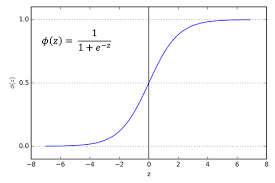

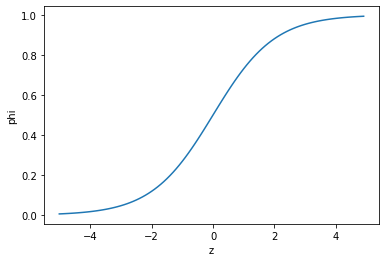

In [18]:
# 위 시그모이드 함수는 아래처럼 시각화 해볼 수 있다.
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [20]:
# 자 이제 로지스틱 회귀를 해보자.
# 먼저 이진 분류를 해보자. (0.5보다 크면 양성클래스, 아니면 음성 클래스로 판단.)
# 도미와 빙어 두 클래스에 대한 데이터로 해본다.

# Python은 인덱스로 True, False 를 전달하여 특정 인덱스의 값만 추려낼 수 있다.
# 이를 '불리언 인덱싱' 이라고 한다.

char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
filteredArray = char_arr[[True, False, False, True, True]]
print(filteredArray)

['A' 'D' 'E']


In [23]:
# 이렇게 불리언 인덱싱을 활용해서 도미(Bream), 빙어(Smelt) 의 행만 골라내보자.
# train_target과 shape이 같고 도미와 빙어만 True로, 나머지는 False인 배열을 만들자.
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

train_bream_smelt = train_scaled[bream_smelt_indexes]
train_target_bream_smelt = train_target[bream_smelt_indexes]

(119,)
(119,)


In [25]:
# 로지스틱 회귀는 sklearn.linear_model 에 있다.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, train_target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [26]:
# 두 번째 샘플만 제외하고 나머지들은 모두 도미로 분류했다.
# lr도 KNeighborsClassifier 처럼 predict_proba() 메서드를 제공하기 때문에 그 결과를 확인해보자.

print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [27]:
# 샘플마다 2개의 확률이 출력되었다.
# 첫 번째 열이 '음성' 클래스에 대한 확률, 두 번째 열이 '양성' 클래스에 대한 확률이다.
# 둘 중 어떤 게 양성인지 음성인지 확인해보자.

print(lr.classes_)

['Bream' 'Smelt']


In [28]:
# 도미가 음성, 빙어가 양성 클래스임을 알 수 있다.

# 로지스틱 회귀로 이진분류를 성공적으로 했다.
# 선형 회귀처럼 로지스틱 회귀가 학습한 계수들을 확인해보자.

print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [31]:
# 즉 학습된 로지스틱 회귀 모델을 아래 선형 방정식으로 나타낼 수 있다.
# z = (-0.4037798 * Weight) + (-0.57620209 * Length) + (-0.66280298 * Diagonal) +
#     (-1.01290277 * Height) + (-0.73168947 * Width) -2.16155132

# decision_function() (LogisticRegression)
# -> z값을 계산해준다.
decisions = lr.decision_function(train_bream_smelt[:5])
print("z values: ", decisions)

# 이 z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다.
# 파이썬의 scipy 라이브러리에 있는 시그모이드 함수인 expit()를 사용해보자!
from scipy.special import expit
print("sigmoid values of z using expit(decisions): ", expit(decisions))

z values:  [-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
sigmoid values of z using expit(decisions):  [0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [32]:
# [26] 셀의 두 번째 열과 sigmoid 결과가 동일하다.
# 즉, decisions_function() 는 양성 클래스에 대한 z값을 반환한다.

# 여기까지 정리 #
# 1. 이진 분류를 위해 2개의 타겟에 대한 생선 샘플들을 골랐고
# 2. 이를 사용해 로지스틱회귀 모델을 훈련시켰다.
# 3. 이진 분류일 경우 predict_proba() 메서드는 음성/양성 클래스에 대한 확률을 출력
# 4. decision_function() 메서드는 양성클래스에 대한 z값을 계산한다.
# 5. coef_, intercept_ 속성에는 로지스틱 회귀 모델이 학습한 선형 방정식의 계수가 들어있다.

# 이제 이진 분류가 아닌 다중 분류 문제로 넘어가보자.

# 다중분류 by LogisticRegression

> LogisticRegression 은 반복적인(iterative) 알고리즘을 사용한다.

```max_iter``` 매개변수를 지정할 수 있으며 기본값은 100이다.
충분하게 훈련시키기 위해서 사용할 데이터셋에는 1000으로 지정한다.

> LogisticRegression 은 Ridge회귀 와 같이 **계수의 제곱을 규제한다. (이를 ```L2 규제```라고 한다.)**

릿지 회귀에서는 '```alpha```' 매개변수로 규제의 정도를 조절했다.

LogisticRegression에서는 '```C```' 라는 매개변수가 동일 기능을 한다. **```그러나 alpha와는 다르게 작을수록 규제가 더 커진다.```**

C의 기본값은 1이나, 여기서는 규제를 완화하기 위해 20으로 늘린다.

In [33]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print("훈련세트의 결정계수 :", lr.score(train_scaled, train_target))
print("테스트세트의 결정계수 :", lr.score(test_scaled, test_target))

훈련세트의 결정계수 : 0.9327731092436975
테스트세트의 결정계수 : 0.925


In [35]:
# 썩 좋지는 않지만 과대/과소적합되진 않은 것 같다.

# 테스트 세트 첫 5개 샘플에 대한 예측을 출력해보자.
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [38]:
# 이번에는 테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력해보자.
# 소수점 3번째 자리까지만 표기한다.
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))
print(lr.classes_)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [39]:
# 이진 분류는 샘플마다 2개의 확률을 출력하고, 
# 다중 분류는 샘플마다 클래스 개수만큼 확률을 출력한다. -> predict_proba

# 위 다중분류에 대해 학습한 로지스틱회귀 모델의 선형 방정식의 계수를 확인해보자.
print(lr.coef_.shape, lr.intercept_.shape)
print(lr.coef_, lr.intercept_)

(7, 5) (7,)
[[-1.49002087 -1.02912886  2.59345551  7.70357682 -1.2007011 ]
 [ 0.19618235 -2.01068181 -3.77976834  6.50491489 -1.99482722]
 [ 3.56279745  6.34357182 -8.48971143 -5.75757348  3.79307308]
 [-0.10458098  3.60319431  3.93067812 -3.61736674 -1.75069691]
 [-1.40061442 -6.07503434  5.25969314 -0.87220069  1.86043659]
 [-1.38526214  1.49214574  1.39226167 -5.67734118 -4.40097523]
 [ 0.62149861 -2.32406685 -0.90660867  1.71599038  3.6936908 ]] [-0.09205179 -0.26290885  3.25101327 -0.14742956  2.65498283 -6.78782948
  1.38422358]


In [40]:
# 계수들의 shape을 확인해보면 7개 클래스에 대해 5개의 계수(a~e)를 학습한 것을 알 수 있다.
# 즉, 다중분류는 '클래스마다' z값을 계산한다.
# 이 z1~z7 값 중 가장 큰 값을 갖는 클래스가 예측 클래스가 된다.

# 이진 분류에서는 시그모이드 함수를 사용해 z를 확률로 변환시켰다.
# 다중 분류에서는 소프트맥스 함수를 사용해 z를 확률로 변환시킨다.

z1~z7을 각각 e의 제곱으로하여 모두 더한 값을 e_sum 이라고 하자.

z1의 확률로 변환된 값은 e의 z1제곱을 e_sum 으로 나눈 값이다.

아래는 그림으로 나타낸 예시 (k: 클래스 개수)

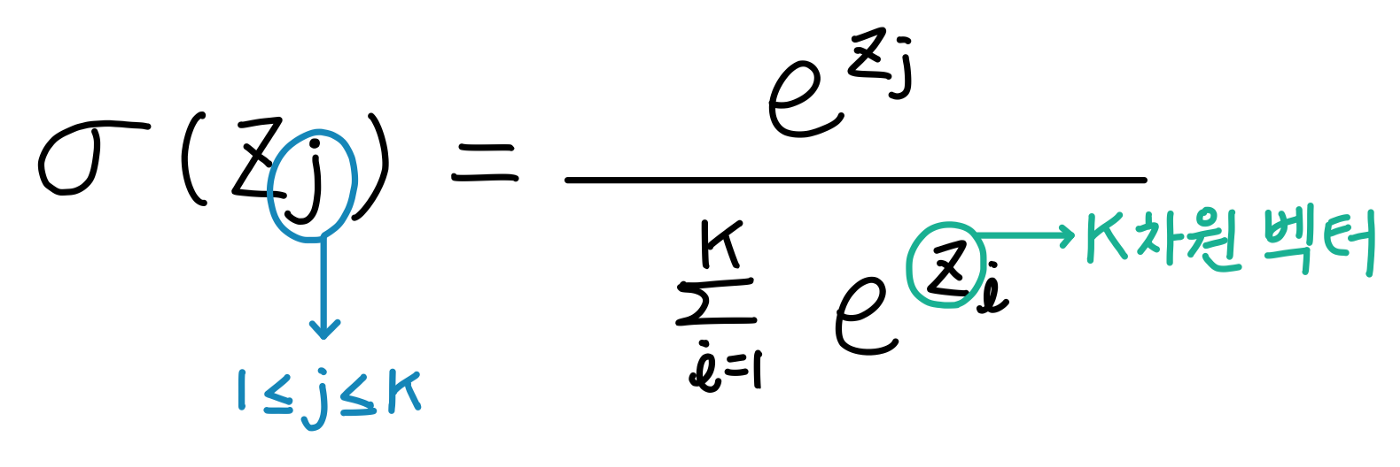

In [41]:
# 이진 분류에서처럼 decision_function() 으로 z1~z7을 구한 뒤 소프트맥스 함수를 사용해서 확률로 바꿔보자.
# 테스트 세트의 첫 5개 샘플에 대해 z1~z7 를 구해보자.

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [43]:
# from scipy.special import expit 으로 시그모이드 함수를 가져온 것처럼 소프트맥스도 scipy 로 가져올 수 있다.
from scipy.special import softmax

# 각 행에 대한 한 샘플의 z값에 대해 열에 대한(axis=1) 소프트맥스 함수 결과를 저장한다.
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
